# Analyse COVID-19

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

## Fetching calculated data

In [45]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [46]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
1512.0,China,2020-01-22,548.0,17.0,1439323.774,153.311826,9388211.0,0.038073,0.001181,2020-01-30,2020-01-22,-8.0,0.0
1513.0,China,2020-01-23,643.0,18.0,1439323.774,153.311826,9388211.0,0.044674,0.001251,2020-01-30,2020-01-22,-7.0,1.0
1514.0,China,2020-01-24,920.0,26.0,1439323.774,153.311826,9388211.0,0.063919,0.001806,2020-01-30,2020-01-22,-6.0,2.0
1515.0,China,2020-01-25,1406.0,42.0,1439323.774,153.311826,9388211.0,0.097685,0.002918,2020-01-30,2020-01-22,-5.0,3.0
1516.0,China,2020-01-26,2075.0,56.0,1439323.774,153.311826,9388211.0,0.144165,0.003891,2020-01-30,2020-01-22,-4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664.0,United Kingdom,2020-03-12,459.0,8.0,67886.004,280.601844,241930.0,0.676133,0.011784,2020-03-10,2020-03-14,2.0,-2.0
7665.0,United Kingdom,2020-03-13,801.0,8.0,67886.004,280.601844,241930.0,1.179919,0.011784,2020-03-10,2020-03-14,3.0,-1.0
7666.0,United Kingdom,2020-03-14,1143.0,21.0,67886.004,280.601844,241930.0,1.683705,0.030934,2020-03-10,2020-03-14,4.0,0.0
7667.0,United Kingdom,2020-03-15,1144.0,21.0,67886.004,280.601844,241930.0,1.685178,0.030934,2020-03-10,2020-03-14,5.0,1.0


# Dynamics

In [58]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [59]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [61]:
df_dynamics_plot = df_dynamics_t.loc[:,['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Iran']]

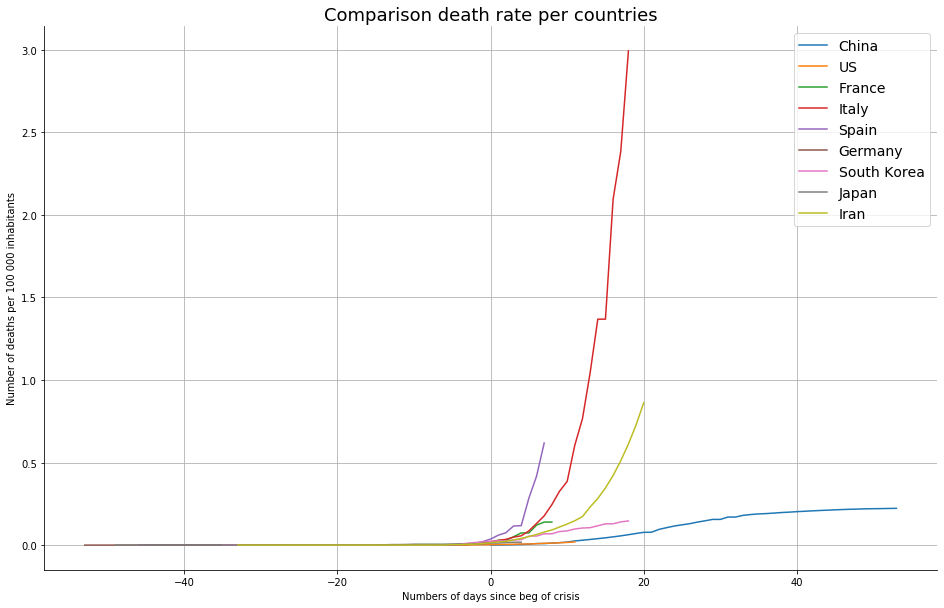

In [64]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10))
plt.title("Comparison death rate per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("save.png")
plt.show() 

In [65]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [54]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[:,['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Iran']]

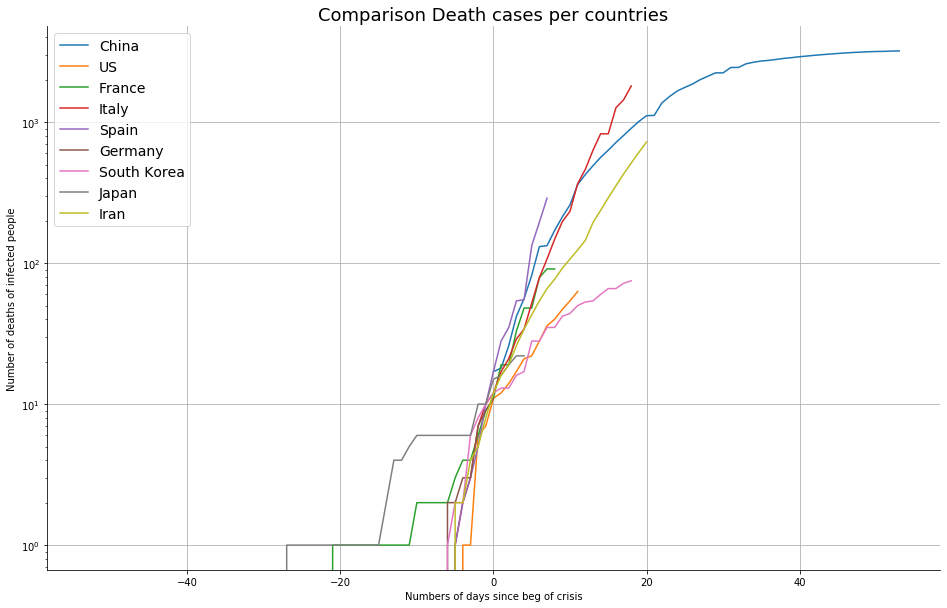

In [63]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10))
plt.title("Comparison Death cases per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("save.png")
plt.show() 